# Introduction

In this lab, we will go through the process of using Isolation Forest for anomaly detection. We will start by generating a dataset with two clusters and some outliers, then train an Isolation Forest model to identify the outliers. Finally, we will visualize the decision boundary of the model to see how it separates the inliers and outliers.

# Data Generation

We will generate a dataset with two clusters and some outliers. The clusters will be generated by randomly sampling from the standard normal distribution. One of them will be spherical, and the other one will be slightly deformed. The outliers will be generated by randomly sampling from a uniform distribution.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Visualize the Dataset

We can visualize the resulting clusters to see how the dataset looks like.

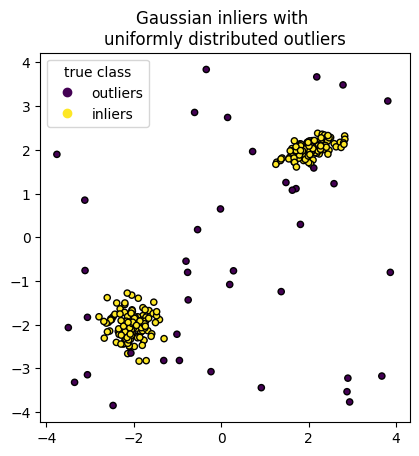

In [2]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

# Train the Model

We will train an Isolation Forest model with the training data.

In [3]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

# Plot the Discrete Decision Boundary

We will use the class **DecisionBoundaryDisplay** to visualize a discrete decision boundary. The background color represents whether a sample in that given area is predicted to be an outlier or not. The scatter plot displays the true labels.

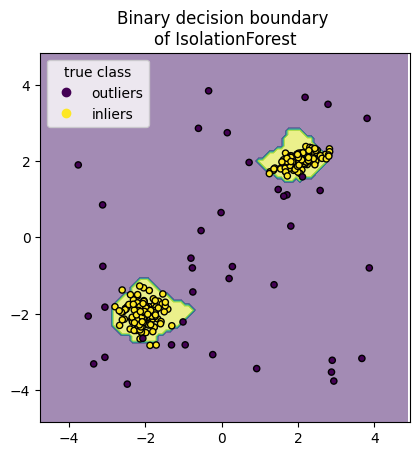

In [4]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

# Plot the Path Length Decision Boundary

By setting the **response_method="decision_function"**, the background of the **DecisionBoundaryDisplay** represents the measure of normality of an observation. Such score is given by the path length averaged over a forest of random trees, which itself is given by the depth of the leaf (or equivalently the number of splits) required to isolate a given sample.

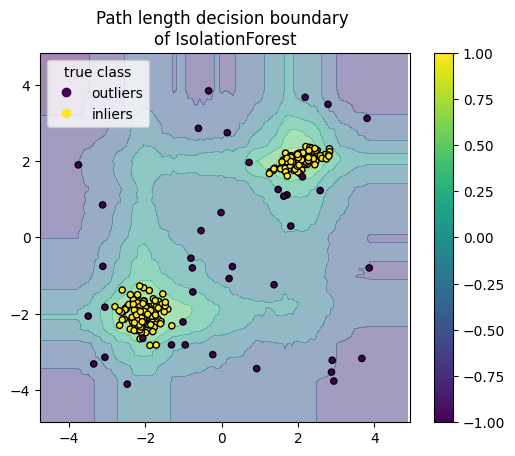

In [5]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

# Summary

In this lab, we learned how to use Isolation Forest for anomaly detection. We generated a dataset with two clusters and some outliers, trained an Isolation Forest model to identify the outliers, and visualized the decision boundary of the model to see how it separates the inliers and outliers.